In [ ]:
!pip install tensorflow keras matplotlib pandas pillow --quiet

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bobibarua
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|██████████| 612M/612M [00:03<00:00, 171MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

In [ ]:
data_dir = "./gtsrb-german-traffic-sign"
print(os.listdir(data_dir))


['Test.csv', 'Meta', 'Test', 'train', 'Train', 'test', 'Train.csv', 'Meta.csv', 'meta']


In [ ]:
train_path = os.path.join(data_dir, "Train")
test_path = os.path.join(data_dir, "Test")
test_csv = os.path.join(data_dir, "Test.csv")

###Loading Training Data

In [ ]:
classes = 43

In [ ]:
X_train, y_train = [], []

for i in range(classes):
    folder = os.path.join(train_path, str(i))
    for img_file in os.listdir(folder):
        img = Image.open(os.path.join(folder, img_file)).resize((32, 32))
        X_train.append(np.array(img))
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

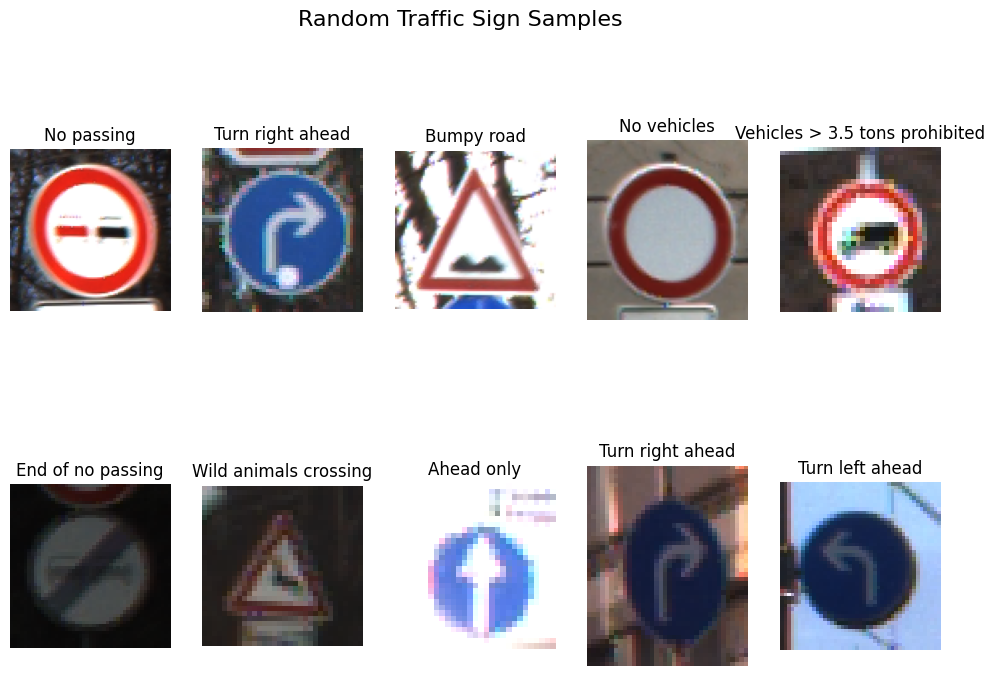

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(10):
    class_id = random.randint(0, classes - 1)
    class_folder = os.path.join(train_path, str(class_id))
    img_file = random.choice(os.listdir(class_folder))
    img_path = os.path.join(class_folder, img_file)
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(classes_dict[class_id])
    plt.axis("off")

plt.suptitle("Random Traffic Sign Samples", fontsize=16)
plt.show()


In [ ]:
print("Training data shape:", X_train.shape, y_train.shape)

Training data shape: (39209, 32, 32, 3) (39209,)


###Loading Test Data

In [ ]:
test_df = pd.read_csv(test_csv)
X_test, y_test = [], []

for _, row in test_df.iterrows():
    img_path = os.path.join(data_dir, row["Path"])
    img = Image.open(img_path).resize((32, 32))
    X_test.append(np.array(img))
    y_test.append(row["ClassId"])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print("Test data shape:", X_test.shape, y_test.shape)

Test data shape: (12630, 32, 32, 3) (12630,)


##Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Input



In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Building CNN

In [ ]:
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,939 (1.36 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

###Training model

In [ ]:
epochs = 20
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=epochs
)

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4538 - loss: 2.0253 - val_accuracy: 0.9703 - val_loss: 0.1194
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9310 - loss: 0.2262 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9584 - loss: 0.1385 - val_accuracy: 0.9885 - val_loss: 0.0400
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9684 - loss: 0.1013 - val_accuracy: 0.9887 - val_loss: 0.0406
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9750 - loss: 0.0810 - val_accuracy: 0.9955 - val_loss: 0.0185
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9787 - loss: 0.0720 - val_accuracy: 0.9912 - val_loss: 0.0314
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9816 - loss: 0.0600 - val_accuracy: 0.9941 - val_loss: 0.0229
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9826 - loss: 0.0583 - val_accuracy: 0

#Plotting Curves

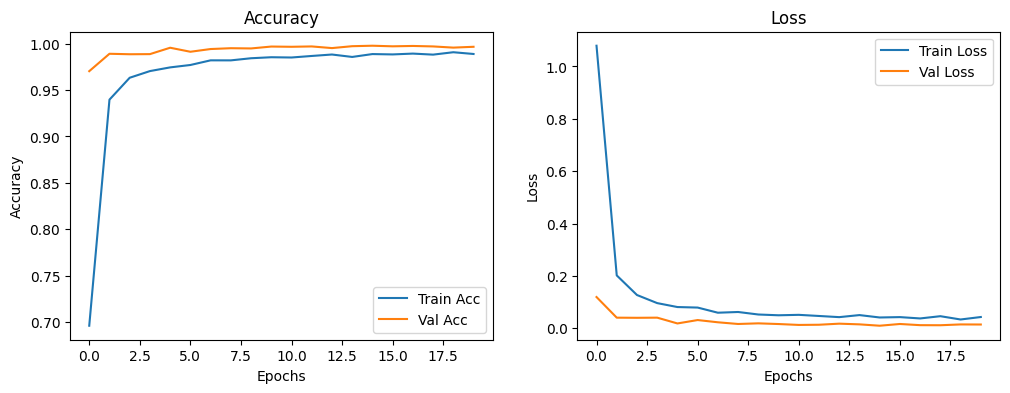

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

y_pred = np.argmax(model.predict(X_test), axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
cm = confusion_matrix(y_test_classes, y_pred)


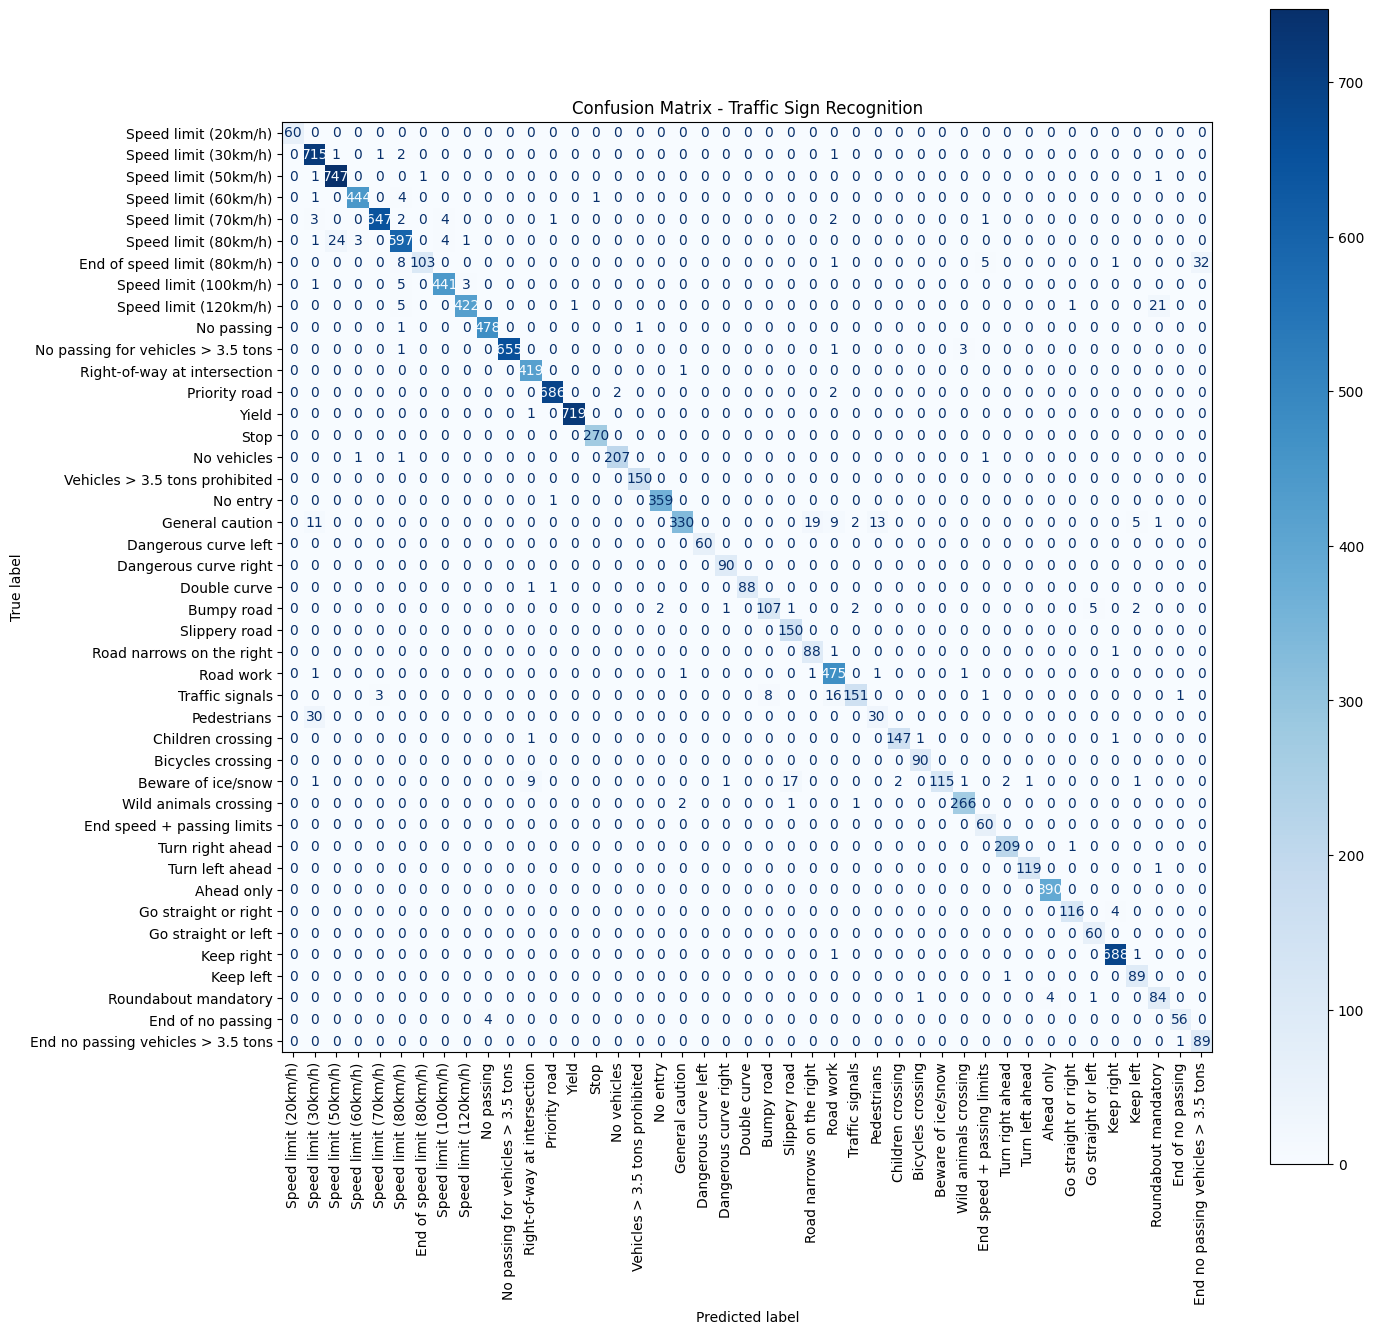

In [ ]:
plt.figure(figsize=(15, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes_dict.values()))
disp.plot(include_values=True, cmap='Blues', xticks_rotation='vertical', ax=plt.gca())
plt.title("Confusion Matrix - Traffic Sign Recognition")
plt.show()


In [ ]:

groups = {
    "Speed Limits": [0, 1, 2, 3, 4, 5, 6, 7, 8],
    "No Passing": [9, 10, 41, 42],
    "Priority Signs": [11, 12, 13, 14],
    "Prohibitions": [15, 16, 17],
    "Warning Signs": [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    "Directions": [32, 33, 34, 35, 36, 37, 38, 39, 40]
}


In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(model.predict(X_test), axis=1)

def map_to_group(idx):
    for group_name, class_list in groups.items():
        if idx in class_list:
            return group_name
    return "Other"

y_true_group = [map_to_group(i) for i in y_true]
y_pred_group = [map_to_group(i) for i in y_pred_indices]
group_labels = list(groups.keys())

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


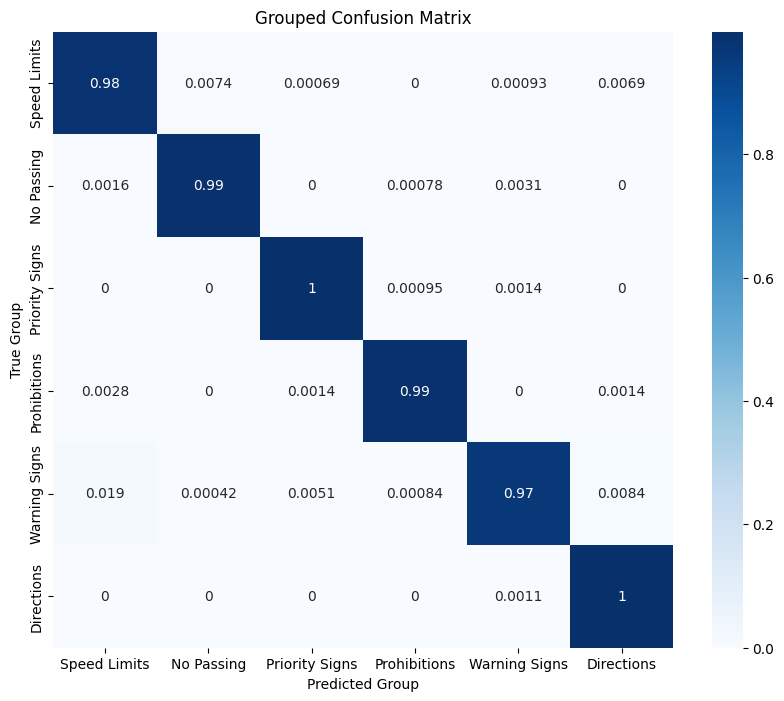

In [ ]:
cm_group = confusion_matrix(y_true_group, y_pred_group, labels=group_labels)
cm_group_norm = cm_group.astype('float') / cm_group.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_group_norm, annot=True, cmap="Blues", xticklabels=group_labels, yticklabels=group_labels)
plt.xlabel("Predicted Group")
plt.ylabel("True Group")
plt.title("Grouped Confusion Matrix")
plt.show()



###Evaluating on Test Set

In [ ]:
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

Test Accuracy: 97.12%


###Saving model

In [ ]:
model.save("gtsrb_cnn_model.h5")
print("Model saved!")

Model saved!


##Prediction

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("gtsrb_cnn_model.h5")

In [ ]:
def predict_image(img_path):
    img = Image.open(img_path).resize((32, 32))
    X = np.array(img).reshape(1, 32, 32, 3) / 255.0
    pred = np.argmax(model.predict(X))
    return img, classes_dict[pred]

Saving 00024.png to 00024.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
Predicted Traffic Sign: Speed limit (30km/h)


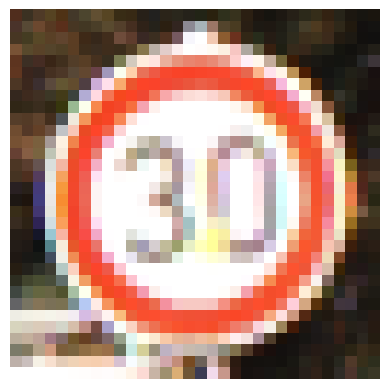

In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    img, label = predict_image(filename)
    print(f"Predicted Traffic Sign: {label}")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [ ]:
from google.colab import files
files.download("gtsrb_cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>